# Time Series by Neighborhood

Imports

In [1]:
import matplotlib.pyplot as plt 
from matplotlib.pylab import rcParams
import pandas as pd
import scipy.stats as sts
import numpy as np
%matplotlib inline
import seaborn as sns
sns.set(style='darkgrid',font='Arial',font_scale=1.2)
rcParams['figure.figsize'] = 12,8
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False

# Dataset from zillow api 

* Dataset was cleaned in [EDA.ipynb]('EDA.ipynb')
* cook county IL filtered
* Values = mean price change over time
* index = neighborhoods (cook county IL only!!)
* columns = time = (YYYY/MM/DD) min=2000-01-31 / max=2022-02-28
* in this test we will test `chicago` individially as a beta test and determine the value of continuing with this method

In [ ]:
# !pip install pycaret

In [12]:
# load dataset
# init setup
!pip install pycaret-ts-alpha

     |████████████████████████████████| 468 kB 5.1 MB/s 
     |████████████████████████████████| 9.8 MB 49.2 MB/s 
     |████████████████████████████████| 6.5 MB 20.8 MB/s 
     |████████████████████████████████| 11.2 MB 30.4 MB/s 
     |████████████████████████████████| 38.1 MB 1.2 MB/s 
     |████████████████████████████████| 274 kB 50.9 MB/s 
     |████████████████████████████████| 199 kB 51.4 MB/s 
     |████████████████████████████████| 1.4 MB 39.1 MB/s 
     |████████████████████████████████| 24.8 MB 1.2 MB/s 
     |████████████████████████████████| 15.7 MB 36.3 MB/s 
     |████████████████████████████████| 79.9 MB 1.3 MB/s 
     |████████████████████████████████| 86 kB 6.0 MB/s 
     |████████████████████████████████| 3.3 MB 42.1 MB/s 
     |████████████████████████████████| 43 kB 2.2 MB/s 
     |████████████████████████████████| 900 kB 45.5 MB/s 
     |████████████████████████████████| 34.5 MB 13 kB/s 
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.5


In [2]:
#import dataset
# url = 'https://raw.githubusercontent.com/tanasijevich/project4/main/Resources/cookcounty.csv'
# dataset = pd.read_csv(url,index_col='RegionName')
dataset = pd.read_csv('./Resources/cookcounty.csv')

In [3]:
dataset

,2000-01-31,2000-02-29,2000-03-31,2000-04-30,2000-05-31,2000-06-30,2000-07-31,2000-08-31,2000-09-30,2000-10-31,...,2021-05-31,2021-06-30,2021-07-31,2021-08-31,2021-09-30,2021-10-31,2021-11-30,2021-12-31,2022-01-31,2022-02-28
RegionName,,,,,,,,,,,,,,,,,,,,,
Chicago,165282.0,165621.0,166381.0,167702.0,169196.0,170566.0,172001.0,173594.0,175129.0,176760.0,...,278732.0,281106.0,283652.0,287049.0,289393.0,291647.0,294440.0,297088.0,299729.0,301283.0
Cicero,128972.0,129220.0,129706.0,130518.0,131517.0,132603.0,133856.0,135013.0,136012.0,137035.0,...,226907.0,229498.0,232578.0,235283.0,237289.0,238760.0,240861.0,243257.0,245957.0,247645.0
Arlington Heights,261429.0,261759.0,262735.0,264406.0,266390.0,267808.0,269428.0,271458.0,273819.0,276055.0,...,390213.0,394921.0,400663.0,405699.0,408596.0,411208.0,414526.0,417568.0,420270.0,421782.0
Schaumburg,206420.0,206899.0,207706.0,208993.0,210318.0,211430.0,213118.0,215316.0,217632.0,219828.0,...,318749.0,322037.0,325884.0,329969.0,332546.0,335233.0,338328.0,341091.0,343829.0,345585.0
Evanston,302592.0,302905.0,303645.0,304993.0,306863.0,308430.0,310211.0,312727.0,316042.0,320664.0,...,502345.0,509733.0,518375.0,526181.0,532433.0,538210.0,544713.0,550440.0,554475.0,556319.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Golf,511254.0,512519.0,515788.0,520828.0,524009.0,527693.0,529683.0,535512.0,537426.0,545143.0,...,812506.0,837445.0,865139.0,879458.0,890257.0,898739.0,909127.0,919617.0,929894.0,935990.0
Hodgkins,146250.0,144877.0,145472.0,146342.0,148481.0,149861.0,150805.0,151201.0,152082.0,153320.0,...,289536.0,292275.0,296267.0,299403.0,302809.0,304813.0,307362.0,308740.0,310763.0,311582.0
McCook,164992.0,162667.0,162618.0,162454.0,162897.0,163778.0,164053.0,165607.0,166947.0,168724.0,...,279015.0,282892.0,288192.0,293391.0,297558.0,301130.0,304551.0,307136.0,309673.0,310853.0


In [4]:
#Transpose data
dataset = dataset.T

In [11]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 266 entries, 2000-01-31 to 2022-02-28
Columns: 120 entries, Chicago to Great Lakes
dtypes: float64(120)
memory usage: 259.6+ KB


In [6]:
#pull sample - 'Chicago' {vector}
chicago = dataset['Chicago']

In [10]:
chicago.describe()

count       266.000000
mean     232531.424812
std       42059.242103
min      165282.000000
25%      198055.000000
50%      229462.000000
75%      260196.750000
max      313324.000000
Name: Chicago, dtype: float64

In [12]:
chicago.index = pd.DatetimeIndex(chicago.index)

In [13]:
#import pycaret time series and load 'Chicago'
from pycaret.time_series import *
setup(data=chicago, fh = 3, fold = 5, session_id = 32)

,Description,Value
0,session_id,32
1,Target,Chicago
2,Approach,Univariate
3,Exogenous Variables,Not Present
4,Data shape,"(266, 1)"
5,Train data shape,"(263, 1)"
6,Test data shape,"(3, 1)"
7,Fold Generator,ExpandingWindowSplitter
8,Fold Number,5
9,Enforce Prediction Interval,False


In [14]:
#compare models
best = compare_models()

,Model,MAE,RMSE,MAPE,SMAPE,MASE,RMSSE,R2,TT (Sec)
et_cds_dt,Extra Trees w/ Cond. Deseasonalize & Detrending,1140.5362,1209.8565,0.0042,0.0043,0.0629,0.0571,0.5659,0.386
dt_cds_dt,Decision Tree w/ Cond. Deseasonalize & Detrending,1373.8391,1618.262,0.0051,0.0051,0.0757,0.0764,0.3854,0.050
ridge_cds_dt,Ridge w/ Cond. Deseasonalize & Detrending,1523.9447,1666.8884,0.0056,0.0057,0.084,0.0787,0.2145,0.050
lr_cds_dt,Linear w/ Cond. Deseasonalize & Detrending,1523.9447,1666.8884,0.0056,0.0057,0.084,0.0787,0.2145,0.050
br_cds_dt,Bayesian Ridge w/ Cond. Deseasonalize & Detren...,1544.358,1703.8738,0.0057,0.0058,0.0851,0.0804,0.1896,0.050
rf_cds_dt,Random Forest w/ Cond. Deseasonalize & Detrending,1678.0403,1886.1903,0.0061,0.0061,0.0923,0.089,0.1411,0.422
huber_cds_dt,Huber w/ Cond. Deseasonalize & Detrending,1752.6474,1873.284,0.0065,0.0065,0.0965,0.0884,0.0999,0.080
auto_arima,Auto ARIMA,2018.5033,2273.5009,0.0074,0.0074,0.1112,0.1073,-0.4001,18.232
exp_smooth,Exponential Smoothing,2081.8684,2242.4836,0.0076,0.0076,0.1146,0.1058,-0.5754,0.562
ets,ETS,2439.7839,2649.9086,0.009,0.009,0.1346,0.1252,-1.7477,0.224


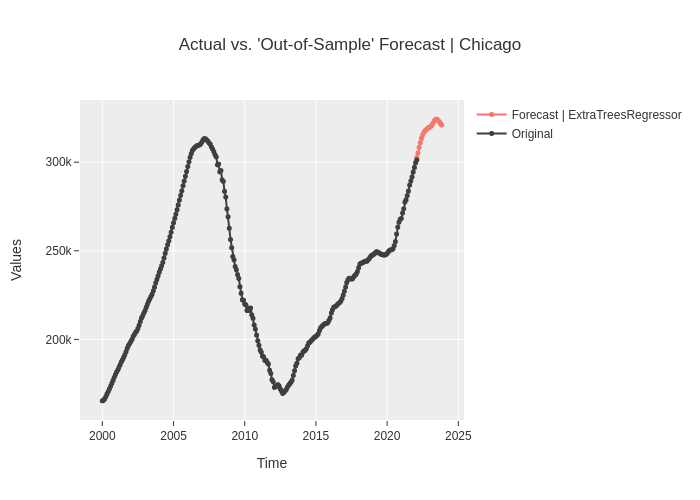

In [15]:
#plot best model forcast
plot_model(best, plot = 'forecast', data_kwargs = {'fh' : 24})

In [16]:
#plot best model diagnostics
plot_model(best, plot = 'diagnostics')

In sample predictions has not been implemented for this estimator of type 'BaseCdsDtForecaster' in `sktime`. When this is implemented, it will be enabled by default in pycaret.
In sample predictions has not been implemented for this estimator of type 'BaseCdsDtForecaster' in `sktime`. When this is implemented, it will be enabled by default in pycaret.


In [17]:
#?
plot_model(best, plot = 'insample')

In sample predictions has not been implemented for this estimator of type 'BaseCdsDtForecaster' in `sktime`. When this is implemented, it will be enabled by default in pycaret.


In [18]:
# finalize model
final_best = finalize_model(best)
predict_model(best, fh = 24)

,y_pred
2021-12,296733.0545
2022-01,299489.7091
2022-02,302592.3577
2022-03,305201.1707
2022-04,308392.4017
2022-05,310992.8729
2022-06,313398.5649
2022-07,315412.0606
2022-08,316791.6705
2022-09,317702.3612


In [19]:
#save test run / evaluate and discuss with team
save_model(final_best, 'TimeSeries_best_model')

Transformation Pipeline and Model Successfully Saved


(BaseCdsDtForecaster(regressor=ExtraTreesRegressor(n_jobs=-1, random_state=32),
                     sp=12, window_length=12), 'TimeSeries_best_model.pkl')

In [20]:
#print details
loaded_model = load_model('TimeSeries_best_model')
print(loaded_model)

Transformation Pipeline and Model Successfully Loaded
BaseCdsDtForecaster(regressor=ExtraTreesRegressor(n_jobs=-1, random_state=32),
                    sp=12, window_length=12)
